In [ ]:
from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance

def lee_filter(img, size):
    img_mean = uniform_filter(img, (size))
    img2=img**2
    img_sqr_mean = uniform_filter(img2, size)
    img_variance = img_sqr_mean - img_mean**2
    overall_variance = variance(img)
    img_weights = img_variance**2 / (img_variance**2 + overall_variance**2)
    img_output = img_mean + img_weights * (img - img_mean)
    return img_output

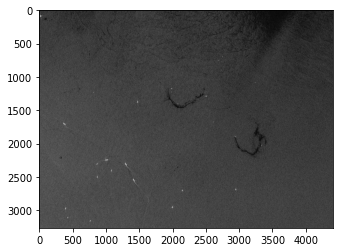

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
import cv2

image = cv2.imread('/content/drive/MyDrive/senario1/test/Untitled Folder/20200610.jpg')
#image = load_img('/content/drive/MyDrive/senario1/test/Untitled Folder/20200821.jpg')
imgplot = plt.imshow(image)

True

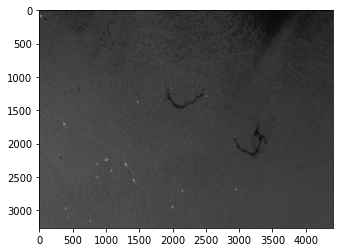

In [ ]:
lee=lee_filter(image,13)
imgplot = plt.imshow(lee/255)
cv2.imwrite('lee_test13.jpg', lee)


In [ ]:
!apt install utils
import numpy as np

import utils

COEF_VAR_DEFAULT = 0.01
CU_DEFAULT = 0.25

def lee_filter2(img, win_size=3, cu=CU_DEFAULT):
    """
    Apply lee to a numpy matrix containing the image, with a window of
    win_size x win_size.
    """
    assert_window_size(win_size)

    # we process the entire img as float64 to avoid type overflow error
    img = np.float64(img)
    img_filtered = np.zeros_like(img)
    N, M = img.shape
    win_offset = win_size / 2

    for i in xrange(0, N):
        xleft = i - win_offset
        xright = i + win_offset

        if xleft < 0:
            xleft = 0
        if xright >= N:
            xright = N

        for j in xrange(0, M):
            yup = j - win_offset
            ydown = j + win_offset

            if yup < 0:
                yup = 0
            if ydown >= M:
                ydown = M

            assert_indices_in_range(N, M, xleft, xright, yup, ydown)

            pix_value = img[i, j]
            window = img[xleft:xright, yup:ydown]
            w_t = weighting(window, cu)
            window_mean = window.mean()
            new_pix_value = (pix_value * w_t) + (window_mean * (1.0 - w_t))

            assert new_pix_value >= 0.0, \
                    "ERROR: lee_filter(), pixel filtered can't be negative"

            img_filtered[i, j] = round(new_pix_value)

    return img_filtered

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package utils


ModuleNotFoundError: ignored

In [ ]:
imgplot = plt.imshow(lee_filter2(image,7))

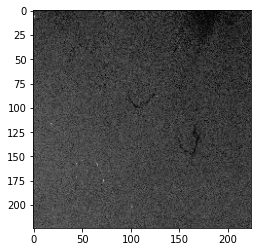

In [ ]:
image = load_img('/content/drive/MyDrive/senario1/test/Untitled Folder/20200610.jpg', target_size=(224, 224))
imgplot = plt.imshow(image)
im1 = image.save("224_original.jpg")

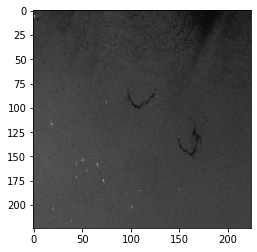

In [ ]:
image = load_img('/content/lee_test13.jpg', target_size=(224, 224))
imgplot = plt.imshow(image)
im1 = image.save("224_lee_test13.jpg")

In [ ]:
import os
from osgeo import gdal
import cv2
from PIL import Image
dir='/content/drive/MyDrive/senario1/train'
dirout='/content/drive/MyDrive/senario1_224/train'
classes=['/spill/', '/notspill/']
for item in classes:
    dir1=dir+item
    dirout1=dirout+item

    directory = os.fsencode(dir1)

    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        image = cv2.imread(dir1+filename)
        print(dir1+filename)
        lee=lee_filter(image,9)
        lee_resize = cv2.resize(lee, (224,224))
        cv2.imwrite(dirout1+filename, lee_resize)
         

/content/drive/MyDrive/senario1/train/spill/20150414.jpg
/content/drive/MyDrive/senario1/train/spill/20150426.jpg
/content/drive/MyDrive/senario1/train/spill/20150225.jpg
/content/drive/MyDrive/senario1/train/spill/20150309.jpg
/content/drive/MyDrive/senario1/train/spill/20150601.jpg
/content/drive/MyDrive/senario1/train/spill/20150402.jpg
/content/drive/MyDrive/senario1/train/spill/20150613.jpg
/content/drive/MyDrive/senario1/train/spill/20150707.jpg
/content/drive/MyDrive/senario1/train/spill/20150719.jpg
/content/drive/MyDrive/senario1/train/spill/20150731.jpg
/content/drive/MyDrive/senario1/train/spill/20150905.jpg
/content/drive/MyDrive/senario1/train/spill/20150917.jpg
/content/drive/MyDrive/senario1/train/spill/20150929.jpg
/content/drive/MyDrive/senario1/train/spill/20151210.jpg
/content/drive/MyDrive/senario1/train/spill/20161216.jpg
/content/drive/MyDrive/senario1/train/spill/20161228.jpg
/content/drive/MyDrive/senario1/train/spill/20161204.jpg
/content/drive/MyDrive/senario1

In [ ]:
import os
from osgeo import gdal
import cv2
from PIL import Image
dir='/content/drive/MyDrive/senario1/valid'
dirout='/content/drive/MyDrive/senario1_224/valid'
classes=['/spill/', '/notspill/']
for item in classes:
    dir1=dir+item
    dirout1=dirout+item

    directory = os.fsencode(dir1)

    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        image = cv2.imread(dir1+filename)
        print(dir1+filename)
        lee=lee_filter(image,9)
        lee_resize = cv2.resize(lee, (224,224))
        cv2.imwrite(dirout1+filename, lee_resize)
         

/content/drive/MyDrive/senario1/valid/spill/20180116.jpg
/content/drive/MyDrive/senario1/valid/spill/20180128.jpg
/content/drive/MyDrive/senario1/valid/spill/20180410.jpg
/content/drive/MyDrive/senario1/valid/spill/20180715.jpg
/content/drive/MyDrive/senario1/valid/spill/20180703.jpg
/content/drive/MyDrive/senario1/valid/spill/20181019.jpg
/content/drive/MyDrive/senario1/valid/notspill/20191225.jpg
/content/drive/MyDrive/senario1/valid/notspill/20191213.jpg
/content/drive/MyDrive/senario1/valid/notspill/20191201.jpg
/content/drive/MyDrive/senario1/valid/notspill/20191119.jpg
/content/drive/MyDrive/senario1/valid/notspill/20191107.jpg
/content/drive/MyDrive/senario1/valid/notspill/20200118.jpg
/content/drive/MyDrive/senario1/valid/notspill/20200130.jpg
/content/drive/MyDrive/senario1/valid/notspill/20200211.jpg
/content/drive/MyDrive/senario1/valid/notspill/20200223.jpg
/content/drive/MyDrive/senario1/valid/notspill/20200306.jpg
/content/drive/MyDrive/senario1/valid/notspill/20200318.jp

In [ ]:
import os
from osgeo import gdal
import cv2
from PIL import Image
dir='/content/drive/MyDrive/s1_suez_jpg2/'
dirout='/content/drive/MyDrive/all_244/'

directory = os.fsencode(dir)

for file in os.listdir(directory):
    filename = os.fsdecode(file)
    image = cv2.imread(dir+filename)
   # print(dir+filename)
    lee=lee_filter(image,9)
    lee_resize = cv2.resize(lee, (224,224))
    cv2.imwrite(dirout+filename, lee_resize)
         